In [2]:
import pandas as pd

df = pd.read_csv("HHS_Unaccompanied_Alien_Children_Program.csv")
df.head()

,Date,Children apprehended and placed in CBP custody*,Children in CBP custody,Children transferred out of CBP custody,Children in HHS Care,Children discharged from HHS Care
0,21-Dec-25,6,18,11,"2,484",14
1,18-Dec-25,11,50,6,"2,472",16
2,17-Dec-25,7,31,11,"2,481",10
3,16-Dec-25,8,54,15,"2,468",9
4,15-Dec-25,11,42,9,"2,470",7


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

df = df.sort_values('Date')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 719 to 0
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             720 non-null    datetime64[ns]
 1   Children apprehended and placed in CBP custody*  720 non-null    int64         
 2   Children in CBP custody                          720 non-null    int64         
 3   Children transferred out of CBP custody          720 non-null    int64         
 4   Children in HHS Care                             720 non-null    int64         
 5   Children discharged from HHS Care                720 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 39.4 KB


In [8]:
# Transfer Efficiency Ratio (CBP → HHS speed)
df['Transfer_Efficiency'] = (df['Children transferred out of CBP custody'] /
    df['Children in CBP custody'])

# Discharge Effectiveness (HHS → Sponsor placement success)
df['Discharge_Effectiveness'] = (df['Children discharged from HHS Care'] /
    df['Children in HHS Care'])

# Pipeline Throughput (overall system flow)
df['Pipeline_Throughput'] = (df['Children discharged from HHS Care'] /
    df['Children apprehended and placed in CBP custody*'])

# View new columns
df[['Date', 'Transfer_Efficiency', 'Discharge_Effectiveness', 'Pipeline_Throughput']].head()

,Date,Transfer_Efficiency,Discharge_Effectiveness,Pipeline_Throughput
719,2023-01-12,0.641509,0.066403,13.212121
718,2023-01-22,0.795918,0.031873,7.093750
717,2023-01-23,0.780000,0.024863,5.656250
716,2023-01-24,1.119048,0.023544,3.723404
715,2023-01-25,1.863636,0.023879,9.000000


In [9]:
# CBP Backlog (kids entering CBP minus those transferred out)
df['CBP_Backlog'] = (df['Children apprehended and placed in CBP custody*'] -
    df['Children transferred out of CBP custody'])

# HHS Backlog (kids entering HHS minus those discharged)
df['HHS_Backlog'] = (df['Children transferred out of CBP custody'] -
    df['Children discharged from HHS Care'])

# View results
df[['Date', 'CBP_Backlog', 'HHS_Backlog']].head()

,Date,CBP_Backlog,HHS_Backlog
719,2023-01-12,-1,-402
718,2023-01-22,-7,-188
717,2023-01-23,-7,-142
716,2023-01-24,0,-128
715,2023-01-25,-21,-139


In [12]:
import matplotlib.pyplot as plt

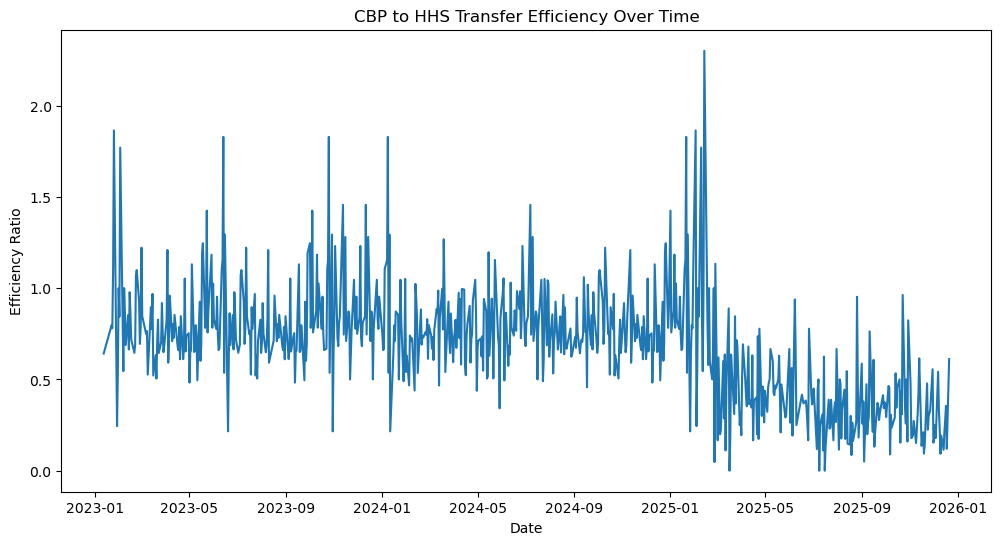

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Transfer_Efficiency'])
plt.title("CBP to HHS Transfer Efficiency Over Time")
plt.xlabel("Date")
plt.ylabel("Efficiency Ratio")
plt.show()

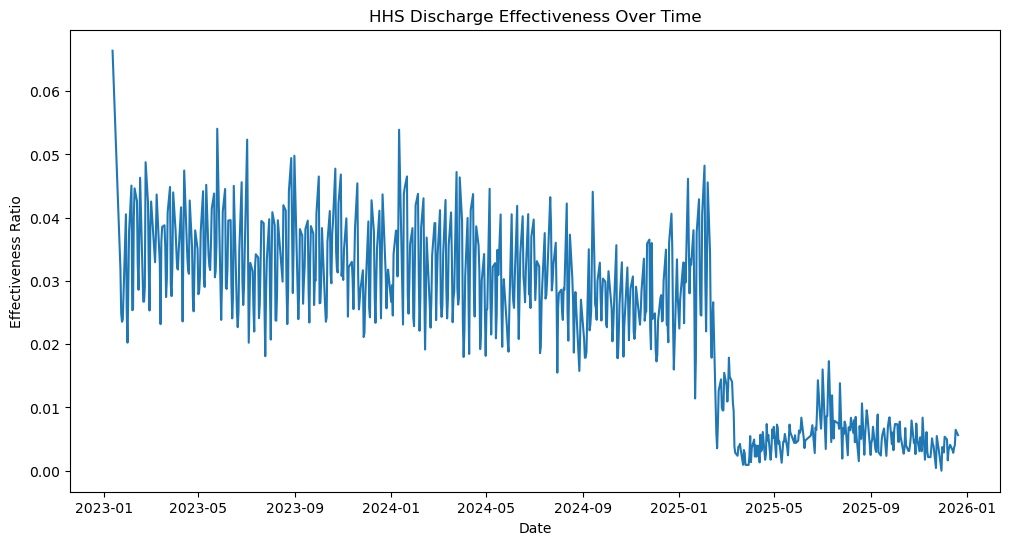

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Discharge_Effectiveness'])
plt.title("HHS Discharge Effectiveness Over Time")
plt.xlabel("Date")
plt.ylabel("Effectiveness Ratio")
plt.show()

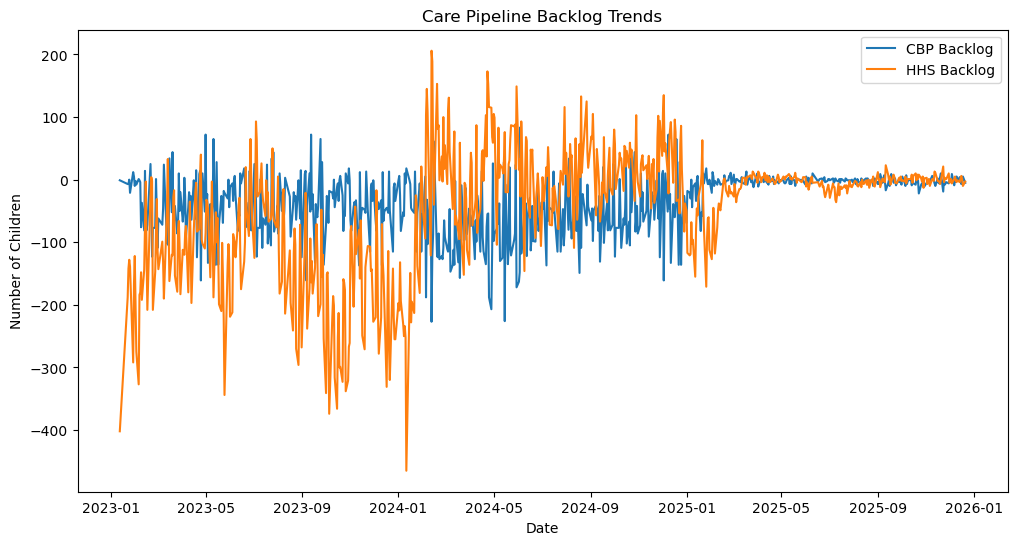

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['CBP_Backlog'], label="CBP Backlog")
plt.plot(df['Date'], df['HHS_Backlog'], label="HHS Backlog")
plt.legend()
plt.title("Care Pipeline Backlog Trends")
plt.xlabel("Date")
plt.ylabel("Number of Children")
plt.show()

In [16]:
# Extract day names
df['Day'] = df['Date'].dt.day_name()

# Compare efficiency by day
day_analysis = df.groupby('Day')[['Transfer_Efficiency', 'Discharge_Effectiveness']].mean()

day_analysis

,Transfer_Efficiency,Discharge_Effectiveness
Day,,
Friday,0.711818,0.024037
Monday,0.660516,0.021711
Sunday,0.700083,0.028396
Thursday,0.732629,0.027853
Tuesday,0.670485,0.018705
Wednesday,0.692006,0.022596


In [18]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_trends = df.groupby('Month')[['Transfer_Efficiency', 'Discharge_Effectiveness']].mean()

monthly_trends.head()

,Transfer_Efficiency,Discharge_Effectiveness
Month,,
2023-01,0.872699,0.032084
2023-02,0.869857,0.035032
2023-03,0.752319,0.035613
2023-04,0.774376,0.034435
2023-05,0.847388,0.034681


In [19]:
df['Outcome_Stability'] = df['Discharge_Effectiveness'].rolling(30).std()

df[['Date', 'Outcome_Stability']].tail()

,Date,Outcome_Stability
4,2025-12-15,0.001682
3,2025-12-16,0.001679
2,2025-12-17,0.001651
1,2025-12-18,0.001734
0,2025-12-21,0.001767
